<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/nhandienmatnguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [32]:
trainset='/content/drive/MyDrive/baitapai/anhai/'

In [33]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 99 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [41]:
validation_set.class_indices

{'phat': 0, 'phuc': 1}

In [42]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
1/1 [==============================] - 50s 50s/step - loss: 1.0972 - accuracy: 0.5556 - val_loss: 46.3246 - val_accuracy: 0.4545
Epoch 2/50
1/1 [==============================] - 18s 18s/step - loss: 46.7648 - accuracy: 0.4545 - val_loss: 0.7036 - val_accuracy: 0.4545
Epoch 3/50
1/1 [==============================] - 17s 17s/step - loss: 0.7367 - accuracy: 0.4848 - val_loss: 0.8849 - val_accuracy: 0.5455
Epoch 4/50
1/1 [==============================] - 18s 18s/step - loss: 0.8954 - accuracy: 0.5455 - val_loss: 0.7130 - val_accuracy: 0.5455
Epoch 5/50
1/1 [==============================] - 17s 17s/step - loss: 0.7099 - accuracy: 0.5455 - val_loss: 0.6887 - val_accuracy: 0.5455
Epoch 6/50
1/1 [==============================] - 17s 17s/step - loss: 0.6916 - accuracy: 0.5859 - val_loss: 0.6870 - val_accuracy: 0.4545
Epoch 7/50
1/1 [==============================] - 18s 18s/step - loss: 0.6915 - accuracy: 0.4545 - val_loss: 0.6807 - val_accuracy: 0.4545
Epoch 8/50
1/1 [=========

In [44]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)


Found 99 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [45]:
model.save('monan15.hs')

In [46]:
label = ['Phat','Phuc']

1/1 [==============================] - 0s 341ms/step
Phat


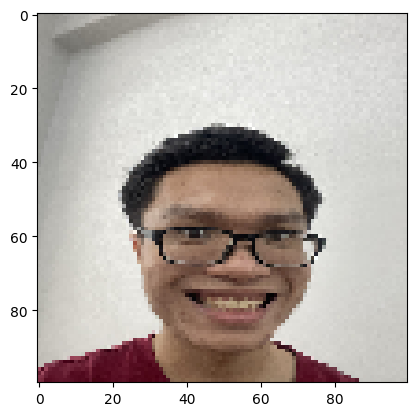

In [49]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/anhai/phat/Phat (23).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/anhai/phuc/Phuc (45).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])